<a href="https://colab.research.google.com/github/juanandres-montero/arbolfamiliar_CostaRica/blob/main/Arbol_familiar_no_web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # Instalar requerimientos
!pip install tqdm -q
from tqdm import tqdm
import time
import os
commands = [
    "pip install selenium -q",
    "apt-get update -qq",
    "pip install pytesseract -q",
    "apt install chromium-chromedriver -qq",
    "pip install webdriver_manager -q",
    "pip install img2pdf pandas -q"
    "pip install fpdf2 -q"
]

for command in tqdm(commands):
    os.system(command)
    time.sleep(0.0001)
from ctypes.util import find_library
find_library("gs")
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

100%|██████████| 6/6 [00:27<00:00,  4.53s/it]

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


Mi nombre es: ANDRICK FABIAN
El padre de ANDRICK FABIAN es: CESAR LUIS PICADO MARIN
La madre de ANDRICK FABIAN es: MARIANNE DEL CARMEN ALVAREZ ARAYA


El padre de CESAR LUIS es: LUIS GERARDO PICADO GONZALEZ
La madre de CESAR LUIS es: TERESA MARIN CERDAS


El padre de MARIANNE DEL CARMEN es: OSCAR ALVAREZ NARVAEZ
La madre de MARIANNE DEL CARMEN es: CARMEN MARIA ARAYA SAENZ


El padre de LUIS GERARDO es: JUAN PICADO CORDERO
La madre de LUIS GERARDO es: TRINIDAD GONZALEZ TENCIO


El padre de TERESA ADONAY DE SAN es: COSTARRICENSE
La madre de TERESA ADONAY DE SAN es: 0


El padre de OSCAR NAPOLEON es: GUILLERMO ALVAREZ
La madre de OSCAR NAPOLEON es: MARTA NARVAEZ


El padre de CARMEN MARIA es: ANTONIO ARAYA MORALES
La madre de CARMEN MARIA es: ADELA SAENZ SANCHEZ




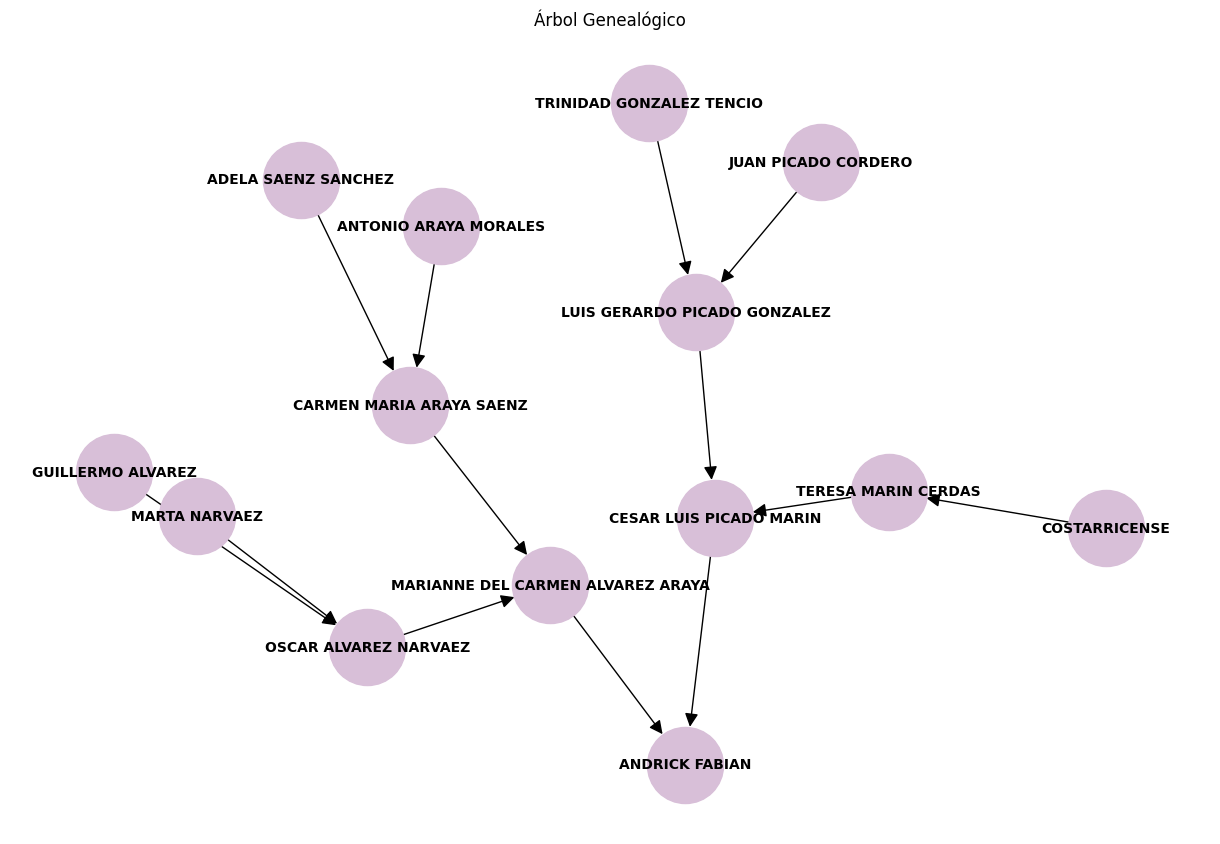

In [49]:
from re import A
#@markdown # Encuentre su árbol familiar
from io import open_code
import time
import warnings
import matplotlib.pyplot as plt
import networkx as nx
warnings.filterwarnings('ignore')




def get_info(cedula):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=options)
  driver.get('https://servicioselectorales.tse.go.cr/chc/consulta_cedula.aspx')
  box = driver.find_element('xpath','//*[@id="txtcedula"]')
  box.send_keys(cedula)
  driver.find_element('xpath','//*[@id="btnConsultaCedula"]').click()
  time.sleep(1.5)
  driver.find_element('xpath','//*[@id="LinkButton11"]').click()
  time.sleep(1)
  table = driver.find_element('xpath', '//*[@id="form1"]/table[2]')
  rows = table.find_elements('xpath','//*[@id="form1"]/table[2]/tbody/tr')
  df = pd.read_html(table.get_attribute('outerHTML'))
  driver.find_element('xpath','//*[@id="ImageConsultaCedula"]').click()
  time.sleep(1)
  return df

def get_info_by_name(nombre,apellido1,apellido2):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=options)
  driver.get('https://servicioselectorales.tse.go.cr/chc/consulta_nombres.aspx')
  box = driver.find_element('xpath','//*[@id="txtnombre"]')
  box.send_keys(nombre)
  box = driver.find_element('xpath','//*[@id="txtapellido1"]')
  box.send_keys(apellido1)
  box = driver.find_element('xpath','//*[@id="txtapellido2"]')
  box.send_keys(apellido2)
  driver.find_element('xpath','//*[@id="btnConsultarNombre"]').click()
  time.sleep(3)
  try:
    driver.find_element('xpath','//*[@id="chk1_0"]').click()
    driver.find_element('xpath','//*[@id="Button1"]').click()
    time.sleep(1)
    ced = driver.find_element('xpath', '//*[@id="lblcedula"]')
    ced = ced.text
    return ced
  except:
    ced = ""
    return ced

def format(df):
  df_transposed = df.transpose()
  f0 = df_transposed.iloc[[0]]
  f1 = df_transposed.iloc[[1]]
  f2 = df_transposed.iloc[[2]]
  f3 = df_transposed.iloc[[3]]
  df0 = pd.concat([f0, f1], axis=0)
  df1 = pd.concat([f2, f3], axis=0)
  df1 = df1.reset_index()
  new_df = pd.concat([df0, df1], axis=1)
  new_df = new_df.drop(columns=['index'])
  new_df.columns = new_df.iloc[0]
  new_df = new_df.drop(0)
  new_df = new_df.dropna(axis=1, how='all')
  return new_df
#@markdown - Ingrese su número de cédula.

def tree(data,yo,string_var):
  padre = data.iloc[0, 7]
  madre = data.iloc[0, 9]
  padre_c = data.iloc[0, 8]  # (fila 0, columna 9)
  madre_c = data.iloc[0, 10]
  print(f"El padre de {yo} es: {padre}")
  print(f"La madre de {yo} es: {madre}")
  print("\n")
  relaciones[yo] = {
        "padre": padre,
        "madre": madre
    }
  try:
    a = '\n' + 'El padre de ' + str(yo) + ' es: ' + str(padre)
    b = '\n' + 'La madre de ' + str(yo) + ' es: ' + str(madre)
    c = '\n'
    string_var = string_var + a + b + c
  except:
    try:
      a= '\n' + 'El padre de ' + str(yo) + ' no está registrado'
      b = '\n' + 'La madre de ' + str(yo) + ' es: ' + str(madre)
      c = '\n'
      string_var = string_var + a + b + c
    except:
      try:
        a = '\n' + 'El padre de ' + str(yo) + ' es: ' + str(padre)
        b = '\n' + 'La madre de ' + str(yo) + ' no está registrada'
        c = '\n'
        string_var = string_var + a + b + c
      except:
        a = '\n' + 'El padre y la madre de ' + str(yo) + 'no están registrados'
        string_var = string_var + a

  if madre_c.isalpha() or padre_c.isalpha():
    cedulas = None
    return cedulas
  if padre_c == '0':
    partes_nombre = padre.split()
    if len(partes_nombre) > 3:
      nombre = partes_nombre[0] + " " + partes_nombre[1]
      apellido1 = partes_nombre[2]
      apellido2 = partes_nombre[3]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 2:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      ### Fix
      padre_c = ""
    else:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      apellido2 = partes_nombre[2]
      padre_c = get_info_by_name(nombre,apellido1,apellido2)
  if madre_c == '0':
    partes_nombre = madre.split()
    if len(partes_nombre) > 3:
      nombre = partes_nombre[0] + " " + partes_nombre[1]
      apellido1 = partes_nombre[2]
      apellido2 = partes_nombre[3]
      madre_c = get_info_by_name(nombre,apellido1,apellido2)
    elif len(partes_nombre) == 2:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      ### Fix
      madre_c = ""
    else:
      nombre = partes_nombre[0]
      apellido1 = partes_nombre[1]
      apellido2 = partes_nombre[2]
      madre_c = get_info_by_name(nombre,apellido1,apellido2)
  if madre_c == "":
    cedulas = padre_c
  elif padre_c == "":
    cedulas = madre_c
  elif padre_c and madre_c == "":
    cedulas = None
  else:
    cedulas = padre_c,madre_c
  data = pd.DataFrame()
  return cedulas, string_var

def main():
  cedula = "305920390" #@param {type:"string"}
  df = pd.DataFrame()
  try:
    df = df._append(get_info(cedula))
  except:
    print('Error: Invalid cedula number')
  data = pd.DataFrame()
  data = data._append(format(df))
  yo = data.iloc[0, 1]
  print(f'Mi nombre es: {yo}')
  relaciones = {}
  string_var = 'Mi nombre es: ' + str(yo)
  cedulas, string_var = tree(data,yo,string_var)
  ids = list(cedulas)
  i=6
  #try:
  while i > 0:

    for cedula in ids:
      if i>0:
        df = pd.DataFrame()
        data = pd.DataFrame()
        df = df._append(get_info(cedula))
        data = data._append(format(df))
        yo = data.iloc[0, 1]
        tupla, string_var = tree(data,yo,string_var)
        try:
          lista_t = list(tupla)
        except:
          lista_t = None
        #try:
        if lista_t != None:
          ids.extend(lista_t)
        #except:
          #print(f'Los padres de {yo} no tienen la cedula registrada en el TSE')
        data = pd.DataFrame()
        df = pd.DataFrame()
        i=i-1
  return string_var
  #except:
   # print('Done!')
    #return string_var
if __name__ == '__main__':
  main()
#@markdown *Código utiliza solo la información disponible en el TSE
import json

# Tu diccionario original
data = relaciones

# Imprime el diccionario en el formato deseado
arbol = json.dumps(data, indent=4, ensure_ascii=False)
arbol = eval(arbol)

index_to_remove = 7

if index_to_remove is not None:
    keys_to_remove = list(arbol.keys())[index_to_remove:]
    for key in keys_to_remove:
        del arbol[key]
for hijo, padres in arbol.items():
    for padre_tipo, padre in padres.items():
        if padre != "0":  # Evitar añadir "0" como nodo
            G.add_edge(padre, hijo)

# Dibujar el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="#d8bfd8", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Árbol Genealógico")
plt.show()
